데이터 : data_regression.zip (수업노트에서 다운로드)
- train.csv, test.csv만 사용
- y_test.csv파일은 최종 평가용임

## 머신러닝
- 문제정의, 라이브러리/데이터 불러오기
- 탐색적 데이터 분석 (EDA)
- 데이터 전처리
- 피처엔지니어링
- (Train/Validation 나누기)
- 모델 선택/훈련/평가/최적화
- 예측
- (csv 생성)

## 문제정의, 라이브러리/데이터 불러오기
- 보험료 예측
- 평가: rmse
- csv: id와 예측 값

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv('data_1/train.csv')
test = pd.read_csv('data_1/test.csv')
y_test = pd.read_csv('data_1/y_test.csv')

## EDA

In [2]:
# 데이터 크기 확인
train.shape, test.shape, y_test.shape

((1070, 8), (268, 7), (268, 2))

In [3]:
# 데이터 샘플 확인 (train)
train.head(5)

,id,age,sex,bmi,children,smoker,region,charges
0,330,61,female,36.385,1,yes,northeast,48517.56315
1,748,47,female,36.000,1,no,southwest,8556.90700
2,684,33,female,18.500,1,no,southwest,4766.02200
3,35,19,male,20.425,0,no,northwest,1625.43375
4,353,33,male,35.245,0,no,northeast,12404.87910


In [4]:
# 데이터 샘플 확인 (test)
test.head(5)

,id,age,sex,bmi,children,smoker,region
0,508,24,female,25.270,0,no,northeast
1,1309,41,male,32.200,2,no,southwest
2,766,47,male,32.300,1,no,southwest
3,667,40,female,32.775,2,yes,northwest
4,1057,45,female,31.790,0,no,southeast


In [5]:
# 결측치 확인 (train)
train.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 결측치 확인 (test)
test.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [8]:
# 통계값 확인
train.describe()

,id,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,671.090654,39.024299,30.730495,1.090654,13193.634800
std,380.666780,13.916945,6.053260,1.204997,12211.531632
min,0.000000,18.000000,16.815000,0.000000,1121.873900
25%,347.250000,27.000000,26.400000,0.000000,4695.398638
50%,673.000000,39.000000,30.400000,1.000000,9273.638800
75%,990.250000,51.000000,34.800000,2.000000,15826.112723
max,1337.000000,64.000000,52.580000,5.000000,63770.428010


In [9]:
# 통계값 object (train)
train.describe(include='object')

,sex,smoker,region
count,1070,1070,1070
unique,2,2,4
top,male,no,southeast
freq,544,856,287


In [10]:
# 통계값 object (test)
test.describe(include='object')

,sex,smoker,region
count,268,268,268
unique,2,2,4
top,female,no,southeast
freq,136,208,77


## 데이터 전처리 및 피처 엔지니어링

In [11]:
# 데이터 샘플
train.head(1)

,id,age,sex,bmi,children,smoker,region,charges
0,330,61,female,36.385,1,yes,northeast,48517.56315


In [13]:
# object 컬럼명 선택
cols = train.select_dtypes(include='object').columns
cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
# 원핫 인코딩
train = pd.get_dummies(train, columns=cols)
test = pd.get_dummies(test, columns=cols)
display(train.head(2))
display(test.head(2))

,id,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,330,61,36.385,1,48517.56315,True,False,False,True,True,False,False,False
1,748,47,36.000,1,8556.90700,True,False,True,False,False,False,False,True


,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,508,24,25.27,0,True,False,True,False,True,False,False,False
1,1309,41,32.20,2,False,True,True,False,False,False,False,True


In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['bmi']
train = scaler.fit_transform(train[cols])
test = scaler.transform(test[cols])

<Axes: >

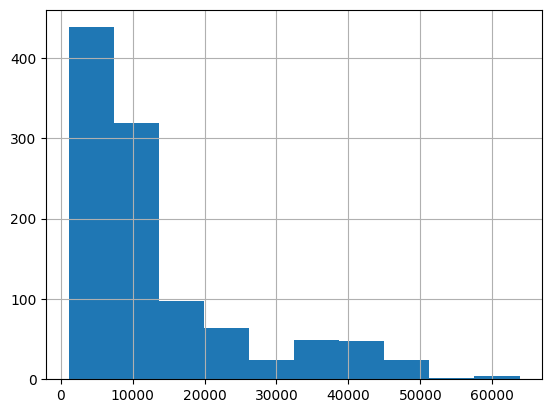

In [15]:
# 로그 스케일 전(시각화)
train['charges'].hist()

In [17]:
# 로그 스케일
import numpy as np
train['charges'] = np.log1p(train['charges'])

<Axes: >

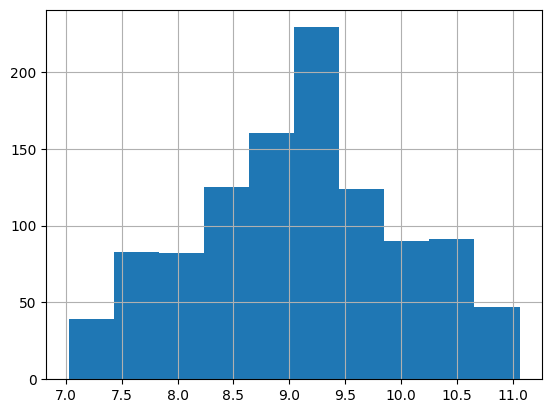

In [18]:
# 로그 스케일 후(시각화)
train['charges'].hist()

## 검증 데이터 분리

In [19]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train.drop('charges', axis=1),
                                            train['charges'],
                                            test_size=0.15,
                                            random_state=42)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((909, 12), (161, 12), (909,), (161,))

In [20]:
# X 데이터 확인
X_tr.head(1)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
497,1292,21,23.21,0,False,True,True,False,False,False,True,False


In [21]:
# y 데이터 확인
y_tr.head(1)

497    7.324058
Name: charges, dtype: float64

In [22]:
# 평가 수식
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_test, pred):
    return np.sqrt(mean_squared_error(y_test, pred))

In [24]:
# LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr, y_tr)
pred = lr.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

7859.258962202854

In [25]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

4927.089809887844

In [26]:
# xgboost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

5121.275977150656

In [27]:
# test 데이터 예측
pred = rf.predict(test)

In [28]:
# 제출용 데이터 프레임
submit = pd.DataFrame(
            {
                'id':test['id'],
                'charges':np.exp(pred)
            }
        )


In [ ]:
# csv파일 생성
submit.to_csv("1111.csv", index=False)

## 평가
- 수험자는 알 수 없는 영역
- 영상에는 np.exp()가 빠져있습니다. np.exp(pred)가 정확한 코드입니다.

In [30]:
y_test = pd.read_csv("data_1/y_test.csv")
rmse(y_test['charges'], np.exp(pred))

4787.651972844437